# Extracting the data

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbol for NASDAQ Composite Index
ticker_symbol = "^IXIC"

# Download the historical data
data = yf.download(ticker_symbol, start="2022-04-01", end="2024-03-31")

# Display the first few rows of the data
print(data.head())

# Save the data to a CSV file
data.to_csv("nasdaq_data.csv")


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2022-04-01  14269.530273  14306.940430  14131.809570  14261.500000   
2022-04-04  14304.349609  14534.379883  14286.450195  14532.549805   
2022-04-05  14490.259766  14500.290039  14169.120117  14204.169922   
2022-04-06  14002.580078  14032.839844  13788.900391  13888.820312   
2022-04-07  13861.490234  13978.250000  13689.230469  13897.299805   

               Adj Close      Volume  
Date                                  
2022-04-01  14261.500000  5002790000  
2022-04-04  14532.549805  4630100000  
2022-04-05  14204.169922  4727710000  
2022-04-06  13888.820312  5360420000  
2022-04-07  13897.299805  4856090000  


# Clean the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [6]:
# Load the data
file_path = 'nasdaq_data.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the data
print(data.head())

                    Open          High           Low         Close  \
Date                                                                 
2022-04-01  14269.530273  14306.940430  14131.809570  14261.500000   
2022-04-04  14304.349609  14534.379883  14286.450195  14532.549805   
2022-04-05  14490.259766  14500.290039  14169.120117  14204.169922   
2022-04-06  14002.580078  14032.839844  13788.900391  13888.820312   
2022-04-07  13861.490234  13978.250000  13689.230469  13897.299805   

               Adj Close      Volume  
Date                                  
2022-04-01  14261.500000  5002790000  
2022-04-04  14532.549805  4630100000  
2022-04-05  14204.169922  4727710000  
2022-04-06  13888.820312  5360420000  
2022-04-07  13897.299805  4856090000  


In [7]:
# Clean the data: Drop columns that are not needed
data = data[['Close']]

# Check for missing values
print("Missing values before interpolation:")
print(data.isnull().sum())

Missing values before interpolation:
Close    0
dtype: int64


# Interpolate missing values

In [9]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Check for missing values again
print("Missing values after interpolation:")
print(data.isnull().sum())

Missing values after interpolation:
Close    0
dtype: int64


# Plotting a line graph

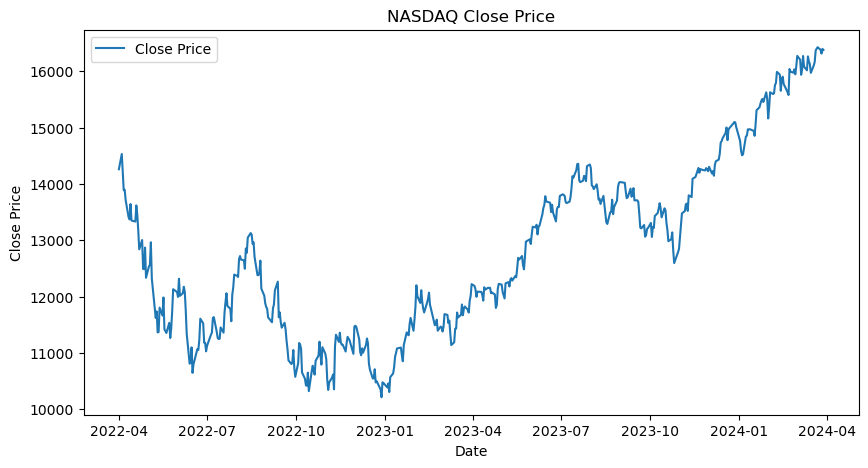

In [11]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Close Price')
plt.title('NASDAQ Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Split the data into training and test sets

In [13]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [14]:
# Display the sizes of the train and test datasets
print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

# Display the first few rows of the train and test datasets
print("Training data:\n", train_data.head())
print("Test data:\n", test_data.head())

Training data size: 400
Test data size: 100
Training data:
                    Close
Date                    
2022-04-01  14261.500000
2022-04-04  14532.549805
2022-04-05  14204.169922
2022-04-06  13888.820312
2022-04-07  13897.299805
Test data:
                    Close
Date                    
2023-11-03  13478.280273
2023-11-06  13518.780273
2023-11-07  13639.860352
2023-11-08  13650.410156
2023-11-09  13521.450195


# Convert the data to monthly frequency

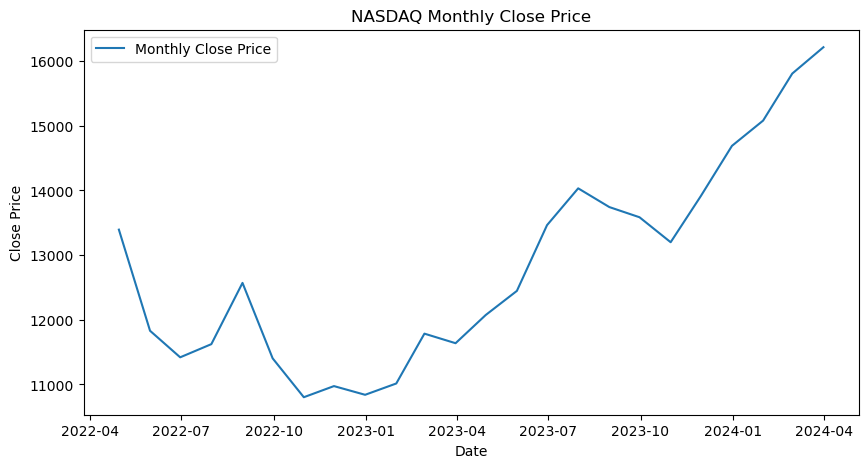

In [16]:
# Convert the data to monthly frequency
monthly_data = data.resample('M').mean()

# Plot the monthly data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Close Price')
plt.title('NASDAQ Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Decompose time series into the components using additive and multiplicative models

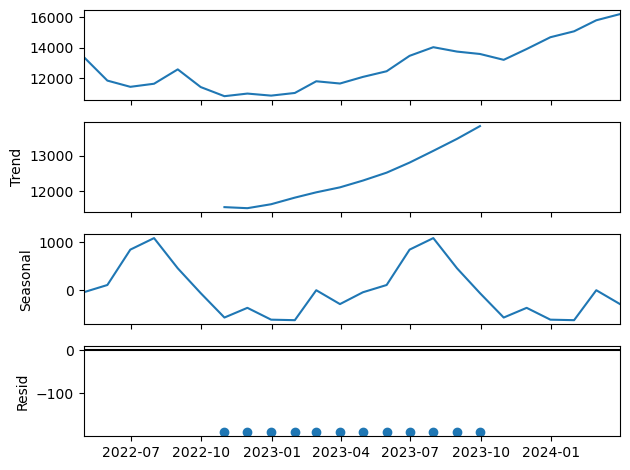

In [18]:
# Decompose the time series using additive model
additive_decompose = seasonal_decompose(monthly_data, model='additive')
additive_decompose.plot()
plt.show()

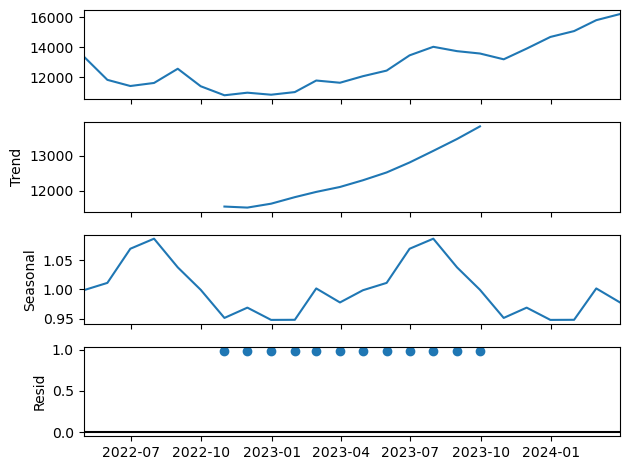

In [19]:
# Decompose the time series using multiplicative model
multiplicative_decompose = seasonal_decompose(monthly_data, model='multiplicative')
multiplicative_decompose.plot()
plt.show()

# Univariate Forecasting - Conventional Models/Statistical Models

## Holt - Winters Model

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(monthly_data, seasonal='add', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

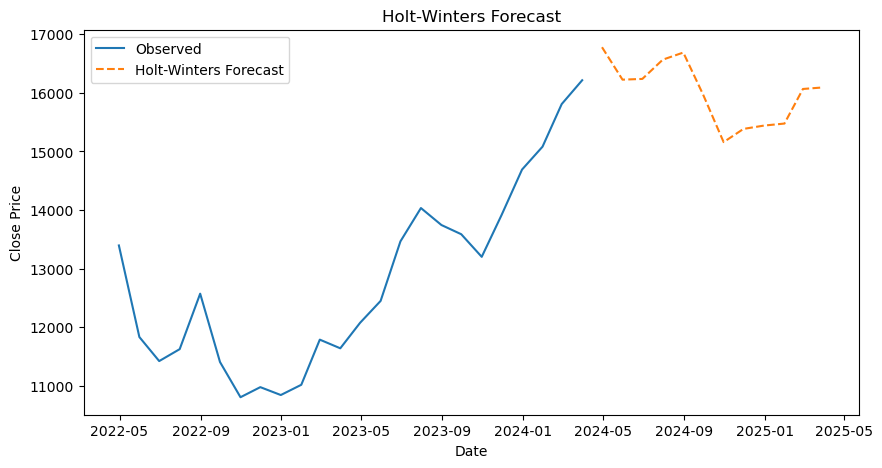

In [23]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## ARIMA Model 

**ARIMA Model - Daily Data**

In [26]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Convert the data to daily frequency
daily_data = data.resample('D').mean()

# Interpolate missing values in the daily data (if any)
daily_data.interpolate(method='time', inplace=True)

# Display the first few rows of the daily data
print(daily_data.head())

# Save the daily data to a new CSV file
daily_data.to_csv('daily_NASDAQ_data.csv')

                   Close
Date                    
2022-04-01  14261.500000
2022-04-02  14351.849935
2022-04-03  14442.199870
2022-04-04  14532.549805
2022-04-05  14204.169922


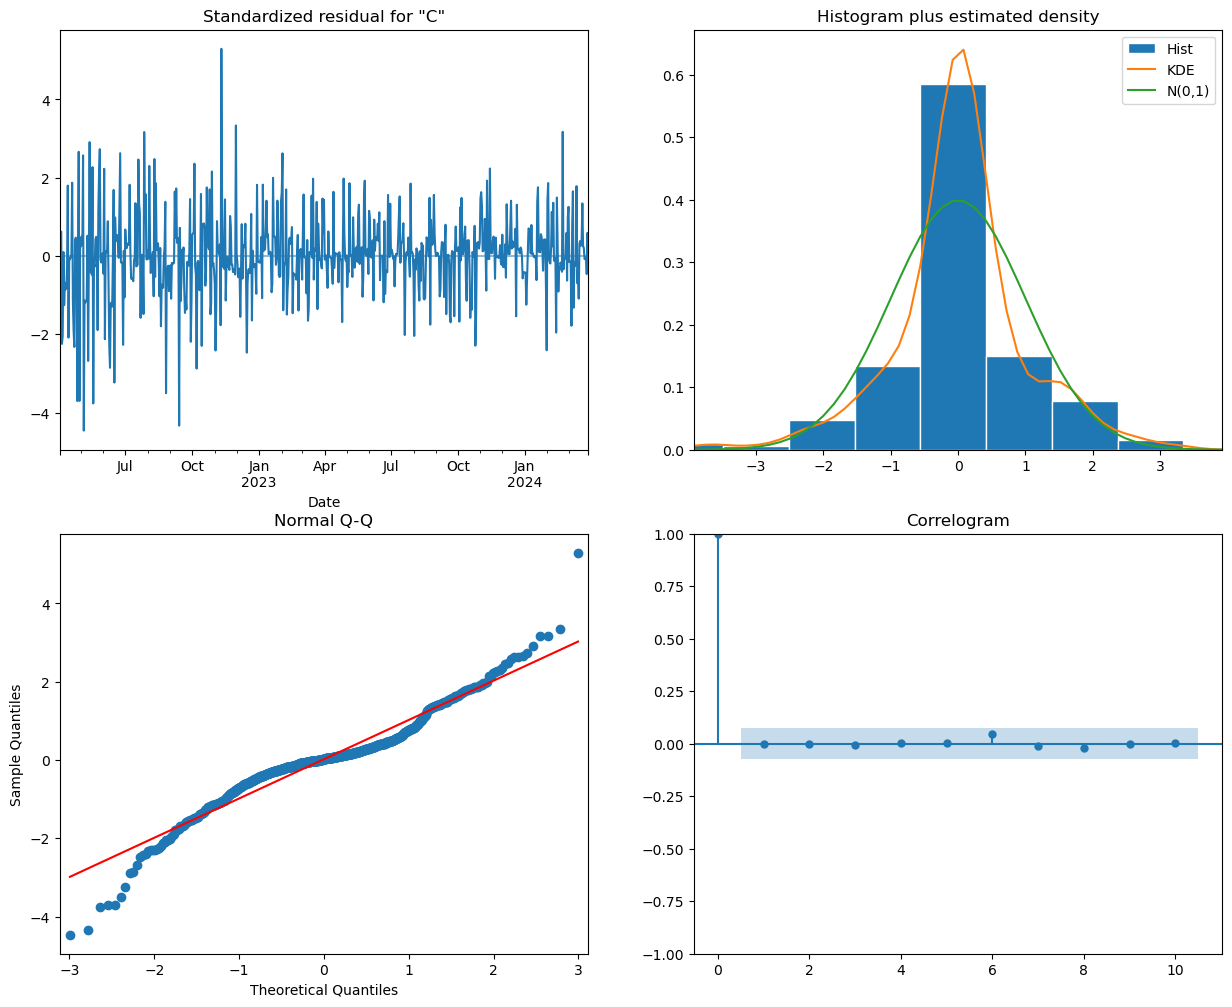

In [27]:
import statsmodels.api as sm

# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(daily_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

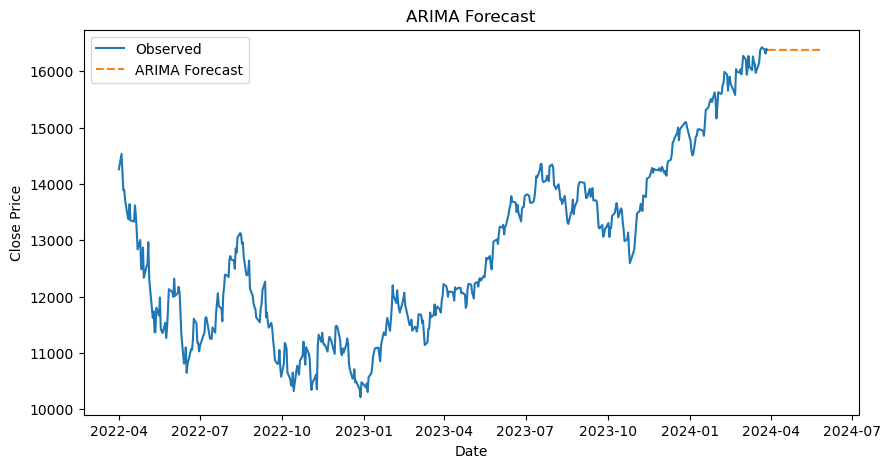

In [28]:
# Forecast for the next 3 months (assuming 21 trading days per month)
arima_forecast = arima_model.forecast(steps=63)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**ARIMA Model - Monthly Data**

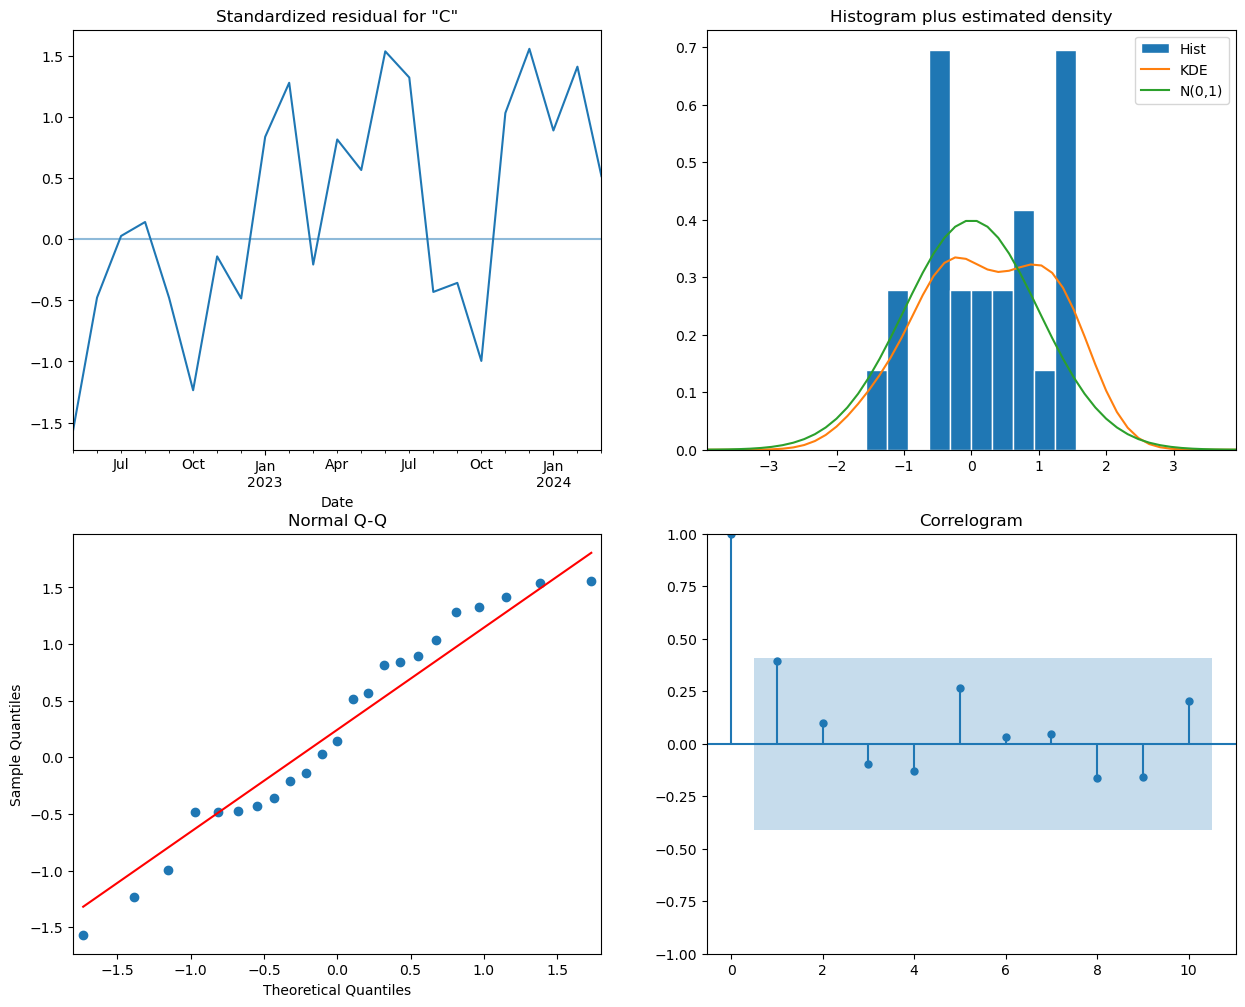

In [30]:
# Fit the ARIMA model on the monthly data
arima_model = sm.tsa.ARIMA(monthly_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

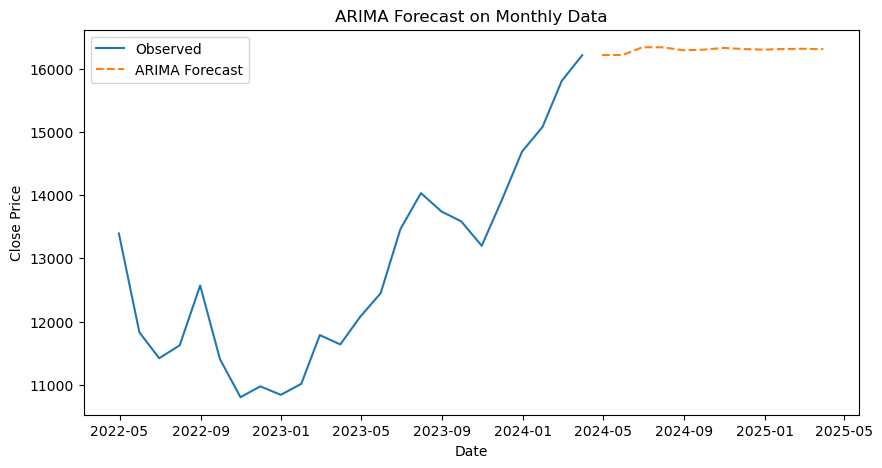

In [31]:
# Forecast for the next 12 months
arima_forecast = arima_model.forecast(steps=12)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast on Monthly Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**SARIMA Model**

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43342D+00    |proj g|=  5.99499D-02


 This problem is unconstrained.



At iterate    5    f=  6.40461D+00    |proj g|=  1.25887D-02

At iterate   10    f=  6.40006D+00    |proj g|=  8.95619D-03

At iterate   15    f=  6.31897D+00    |proj g|=  4.86864D-03

At iterate   20    f=  6.31890D+00    |proj g|=  8.13099D-04

At iterate   25    f=  6.31886D+00    |proj g|=  2.91659D-03

At iterate   30    f=  6.31883D+00    |proj g|=  6.43334D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     36      1     0     0   6.433D-06   6.319D+00
  F =   6.3188293165278040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


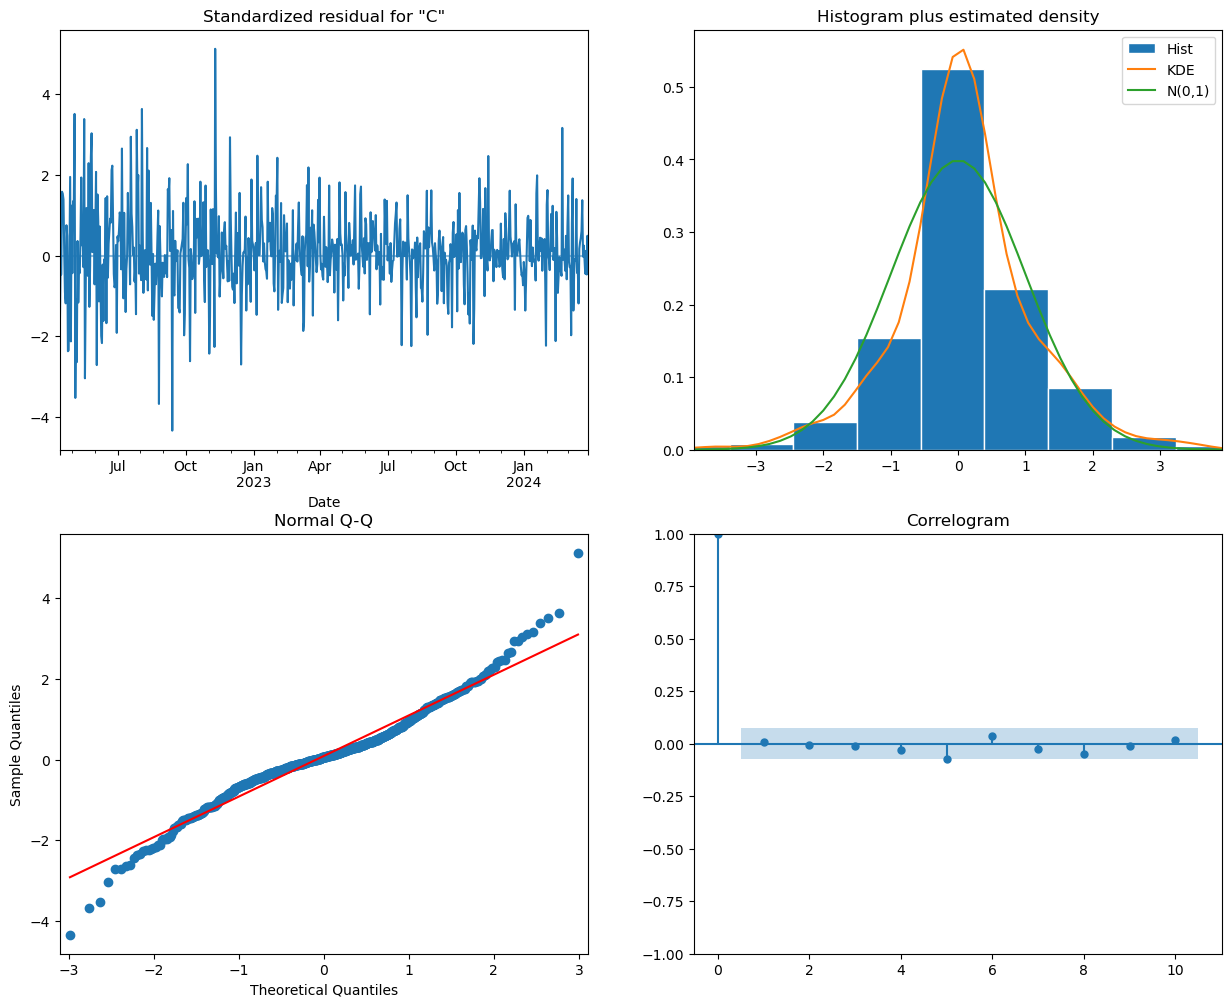

In [33]:
# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Diagnostic checks for SARIMA model
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

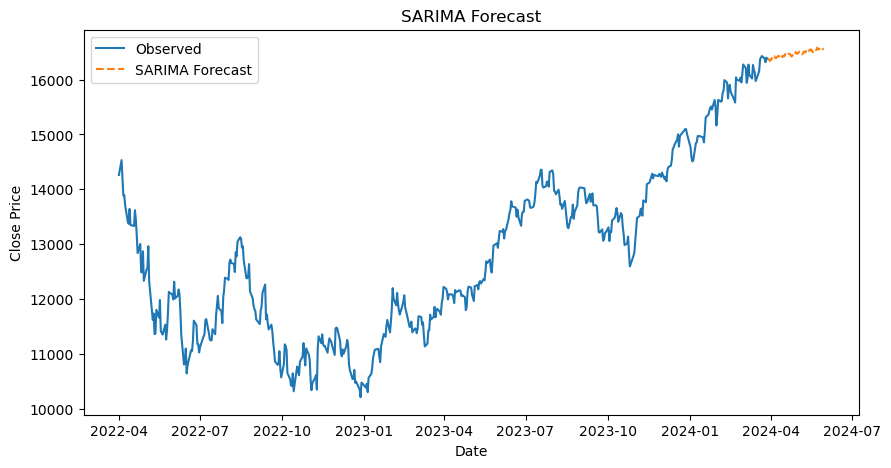

In [34]:
# Forecast for the next 3 months (assuming 21 trading days per month)
sarima_forecast = sarima_model.forecast(steps=63)

# Plot the SARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Multivariate Forecasting - Machine Learning Models

**LSTM Model**

In [39]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 2.2 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.7 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.3 MB/s 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [41]:
# Load the data
file_path = 'nasdaq_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [42]:
# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [43]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

In [44]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0264 - val_loss: 0.0173
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - val_loss: 0.0106
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - val_loss: 0.0176
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107 - val_loss: 0.0128
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - val_loss: 0.0132
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - val_loss: 0.0457
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - val_loss: 0.0201
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0052 - val_loss: 0.0120
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

In [46]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [47]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 5926459221.653938, True Value: 6349580255.997804
Prediction: 6017666058.577895, True Value: 6732372942.46723
Prediction: 6115666247.292161, True Value: 6743459177.33946
Prediction: 6220336919.60752, True Value: 6754979156.716345
Prediction: 6324296866.743565, True Value: 6768820069.748736
Prediction: 6419960823.209882, True Value: 6955212328.955489
Prediction: 6510496009.643674, True Value: 6856127459.645799
Prediction: 6593821481.766105, True Value: 6933332837.029471
Prediction: 6677146953.8885355, True Value: 6915741579.032046
Prediction: 6773771279.381514, True Value: 6904221599.655159


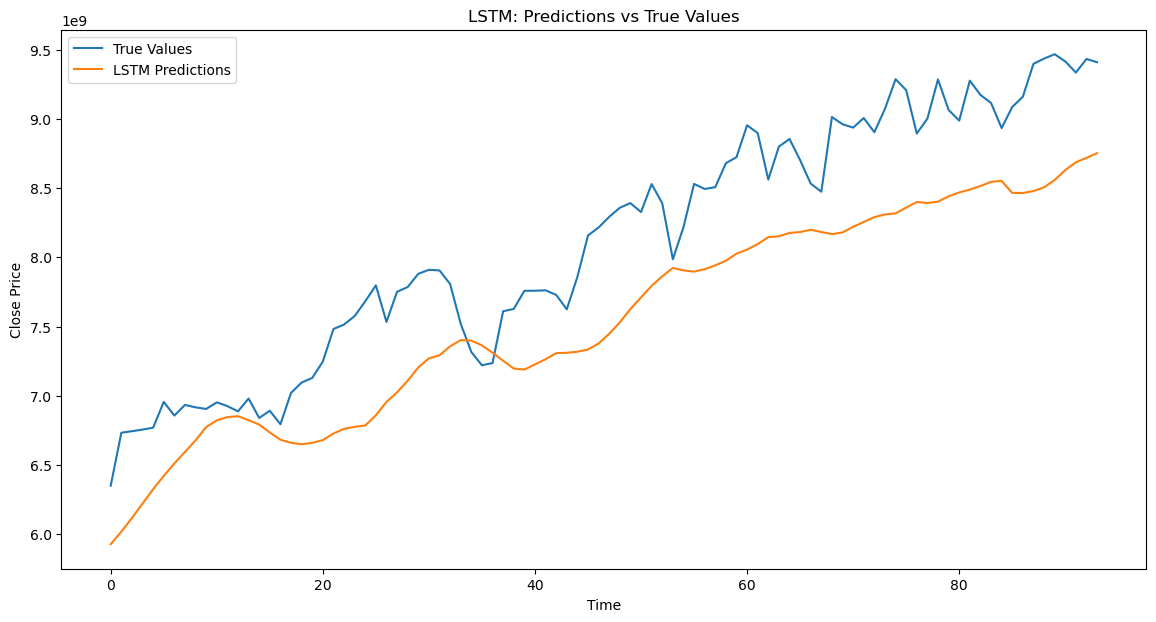

In [48]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Tree Based Models**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [51]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(data.values, sequence_length)

# Reshape X to 2D array for tree-based models
X_reshaped = X.reshape(X.shape[0], -1)

In [52]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [53]:
# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

Decision Tree Mean Squared Error: 2176138.5898897597


In [54]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 2147446.1005277997


In [55]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 13574.2197265625, True Value: 13767.740234375
Prediction: 13918.9599609375, True Value: 14094.3798828125
Prediction: 14113.7001953125, True Value: 14103.83984375
Prediction: 14113.7001953125, True Value: 14113.669921875
Prediction: 14113.7001953125, True Value: 14125.48046875
Prediction: 14127.2802734375, True Value: 14284.5302734375
Prediction: 14127.2802734375, True Value: 14199.98046875
Prediction: 14127.2802734375, True Value: 14265.8603515625
Prediction: 14127.2802734375, True Value: 14250.849609375
Prediction: 14127.2802734375, True Value: 14241.01953125


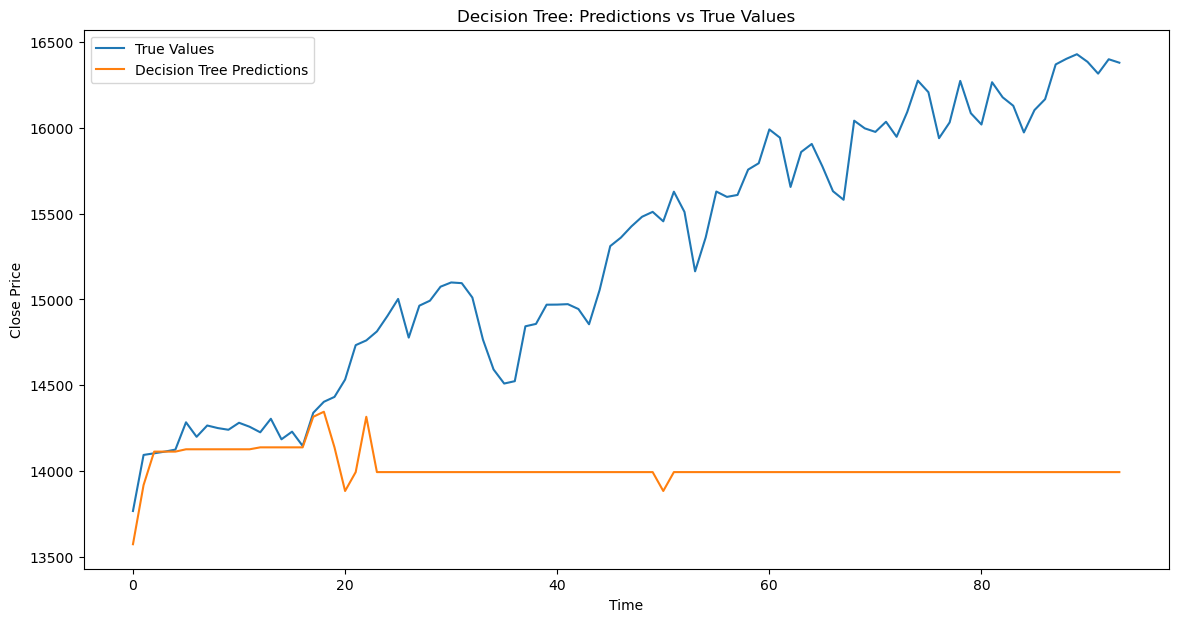

In [56]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [57]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 13657.961669921875, True Value: 13767.740234375
Prediction: 13752.912548828124, True Value: 14094.3798828125
Prediction: 14111.713017578126, True Value: 14103.83984375
Prediction: 14139.84923828125, True Value: 14113.669921875
Prediction: 14188.226416015625, True Value: 14125.48046875
Prediction: 14181.687021484375, True Value: 14284.5302734375
Prediction: 14205.037587890625, True Value: 14199.98046875
Prediction: 14221.04330078125, True Value: 14265.8603515625
Prediction: 14214.6703125, True Value: 14250.849609375
Prediction: 14216.60650390625, True Value: 14241.01953125


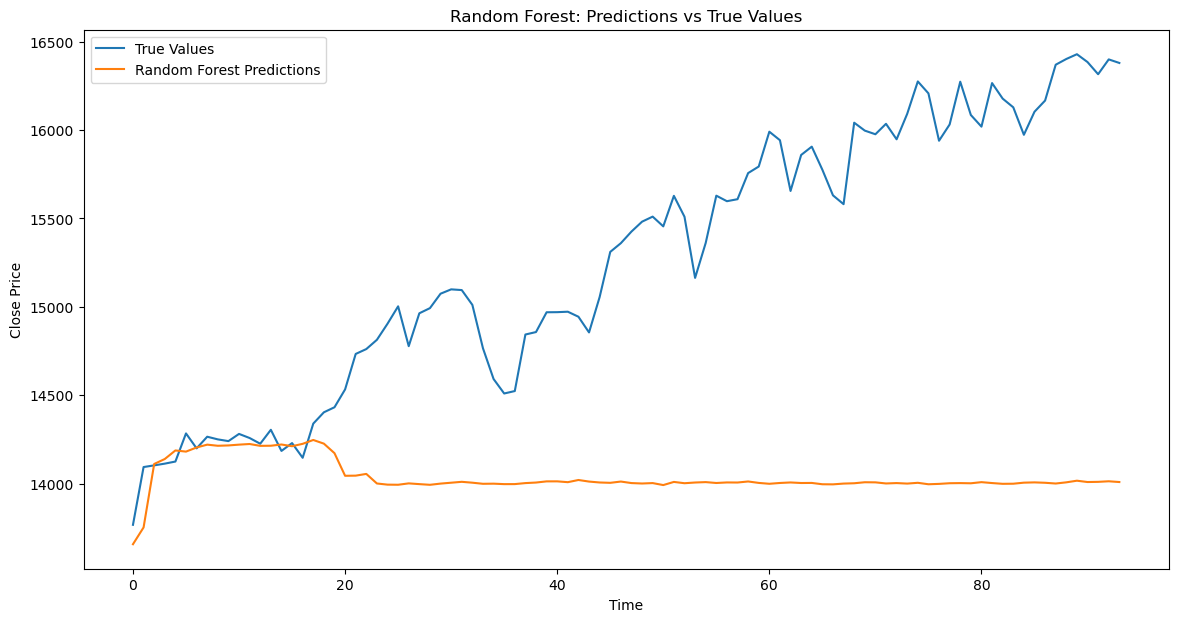

In [58]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

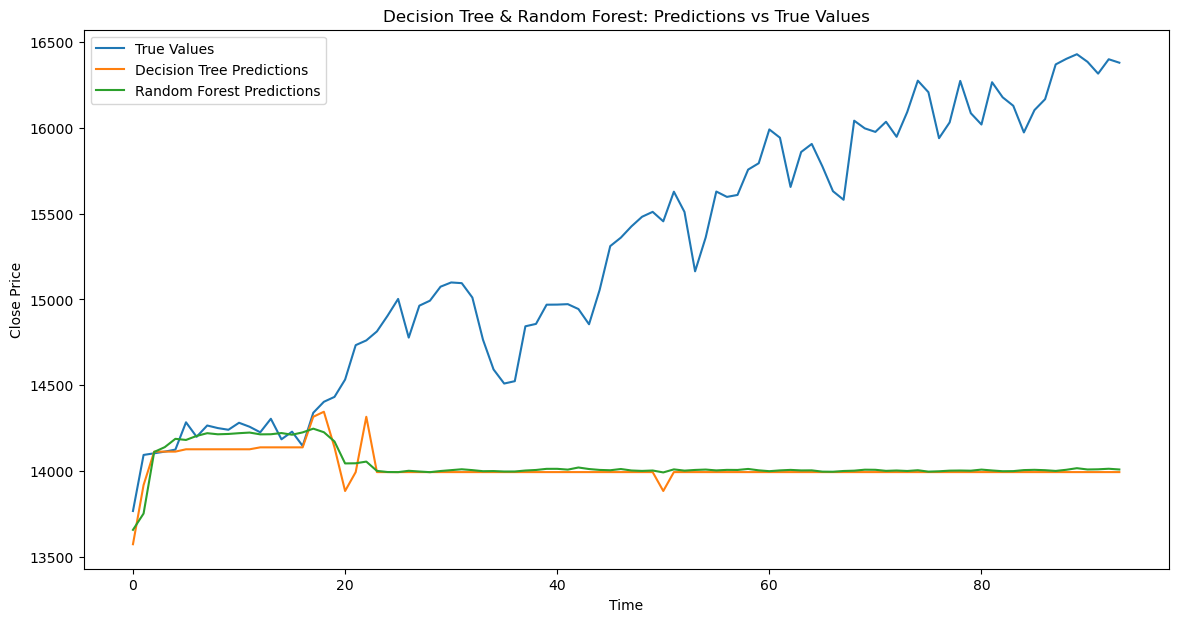

In [59]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

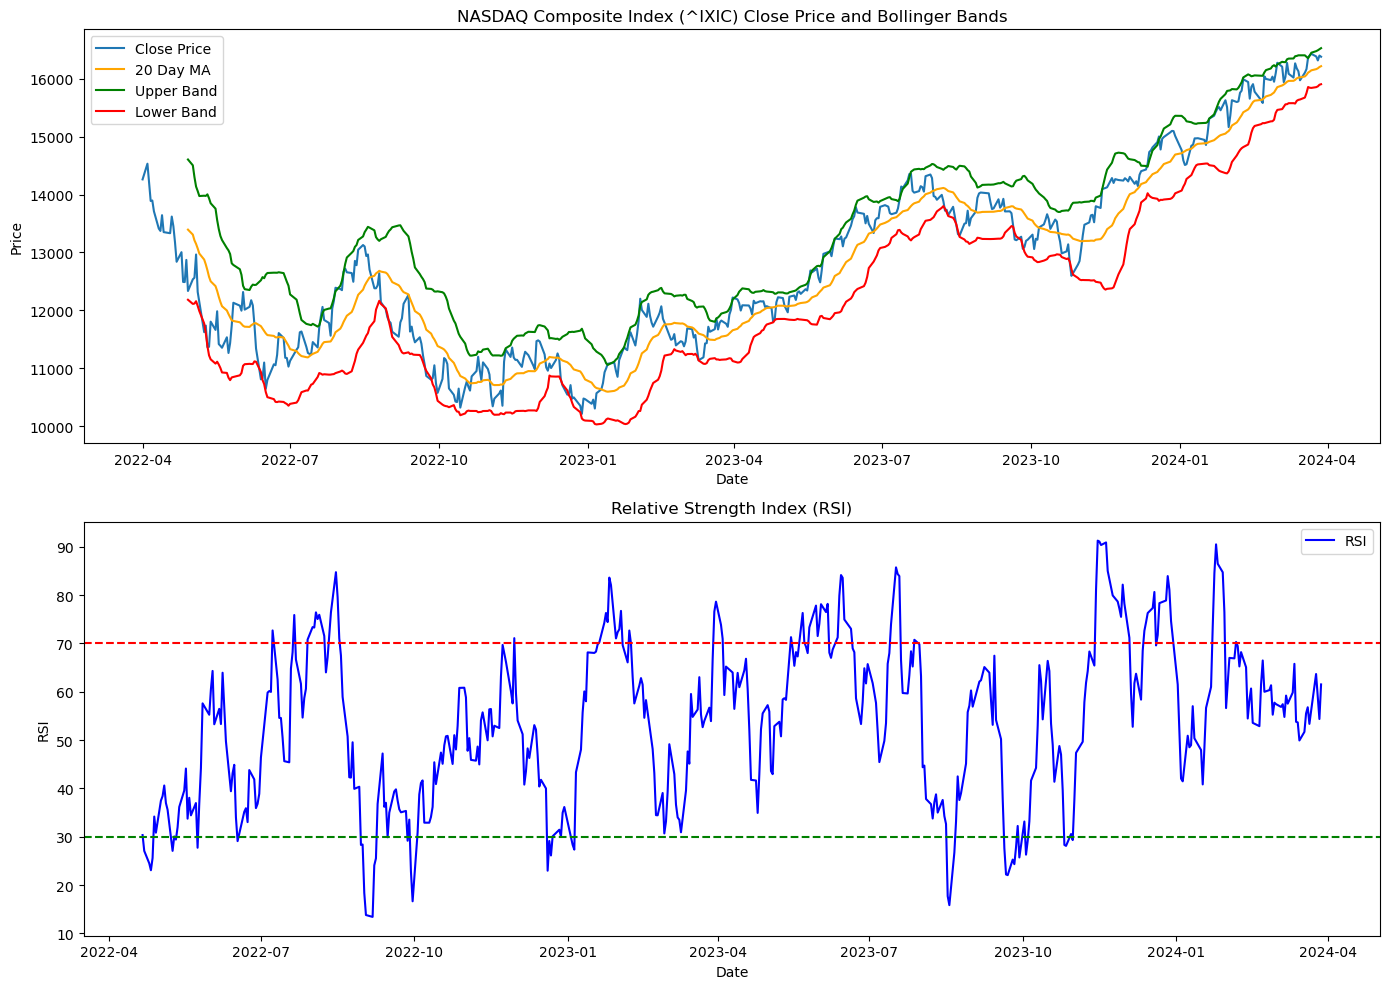

In [60]:

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, 14)

# Calculate Bollinger Bands
data['20 Day MA'] = data['Close'].rolling(window=20).mean()
data['20 Day STD'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['20 Day MA'] + (data['20 Day STD'] * 2)
data['Lower Band'] = data['20 Day MA'] - (data['20 Day STD'] * 2)

# Plotting the Close price, RSI, and Bollinger Bands
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Close price and Bollinger Bands
ax1.plot(data.index, data['Close'], label='Close Price')
ax1.plot(data.index, data['20 Day MA'], label='20 Day MA', color='orange')
ax1.plot(data.index, data['Upper Band'], label='Upper Band', color='green')
ax1.plot(data.index, data['Lower Band'], label='Lower Band', color='red')
ax1.set_title('NASDAQ Composite Index (^IXIC) Close Price and Bollinger Bands')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='blue')
ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='green', linestyle='--')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

plt.tight_layout()
plt.show()